In [1]:
from text_denoiser import TextDenoiser
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
if os.getcwd().endswith("src"):
    os.chdir("..")
from torch.utils.data import DataLoader, TensorDataset
from get_dataset_and_vocab import get_dataset_and_vocab
from utils import text_collate_fn, read_glove_vectors

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
denoiser = TextDenoiser.load_from_training_log("logs/train_test", "saved_model.pt", device)
denoiser.eval()
print(denoiser.decoder.weight.shape)
print(denoiser.embedder.weight.shape)
# denoiser.decoder.weight = nn.Parameter(denoiser.embedder.weight)

torch.Size([574, 100])
torch.Size([574, 100])


NameError: name 'vocab' is not defined

In [3]:
dataset, vocab = get_dataset_and_vocab("wikitext2", seq_len=32, line_slice=20)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=1, collate_fn=text_collate_fn)

wikitext2


In [4]:
x = next(iter(dataloader))

## Reconstructing instances

In [5]:
print(x.shape)
x_emb = denoiser.embedder(x)
print(denoiser.emb_to_str(x_emb)[0])
t_noised = 10
ts = torch.LongTensor([t_noised]*x.shape[1]).to(device)
stored = []
print(x_emb[0, 0, 0:3])
with torch.no_grad():
    x_emb_noised, eps = denoiser.noise(x_emb, ts)
    print(x_emb_noised[0, 0, 0:3])
    x_t = x_emb_noised.clone()
    for t in range(t_noised, 0, -1):
        x_t = denoiser.sample_step(x_t, t)
        stored.append(x_t[0, 0, 0].item())

    # print(denoiser.emb_to_tokens(x_emb)[3])
print(x_t[0, 0, 0:3])
print(denoiser.emb_to_str(x_t)[0])



torch.Size([32, 2])
lose face in the war . while at times this works to their advantage , such as a successful incursion into imperial territory , other orders cause certain members of the 422nd
tensor([0.3589, 0.3586, 0.7197], grad_fn=<SliceBackward0>)
tensor([0.3649, 0.3552, 0.5994])
tensor([0.3281, 0.3493, 0.5572])
lose face in the war . while at times this works to their advantage , such as a successful incursion into imperial territory , other orders cause certain members of the 422nd


tensor([[-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
         -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
          0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
          0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
          0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
         -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
         -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
          0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
          1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
         -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
          0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
          0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
         -0.5203, -0.1459,  

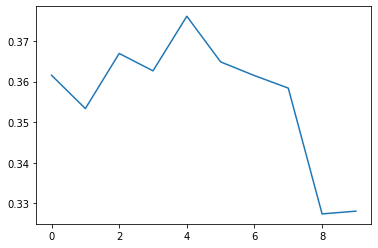

In [8]:
test_emb = denoiser.embedder(torch.LongTensor([denoiser.vocab["the"]]))
print(test_emb)

# denoiser.vocab["."]
plt.plot(stored)



In [7]:
embeddings = read_glove_vectors("resources/glove.6B.100d.txt", vocab, 100)



pitlake
<unk>
@-@
nṯr
leadeth
biotrophic
grivičić
sulfoxonium
atenism
bhringi
amadito
geopyxis
praška
trinsey
maskrays
æsthetic
fruitbodies
iconographies
neotrygon
fitwatch
żeleński
maskray
chaykovsky
noisescapes
carbenoid
annotata
ziltoid
44b
methanide
sulfonium
biomech
gharapuri
aziridines
estañol
gasar
dahau
rushie
senjō
₹
²
andhaka
darcsen
ir8
m1822
waldrons
yogishvara
µm
crimint
°
epicloud
gilii
ginczanka
honjou
khenty
riela
synchestra
terria
戦場のヴァルキュリア3
000th
casemated
ectomycorrhizae
impétueux
kalyanasundara
†


In [8]:
embeddings.shape

torch.Size([10053, 100])

In [3]:
n_T = 40
data = torch.ones(4, 2, 3)
factor = torch.linspace(0, n_T-1, n_T)
ts = torch.randint(0, n_T, (data.shape[1],))
print(factor)
print(ts)
print(data)
data = data * factor[None, ts, None]
# print(data[:, 1, :].mean())
# print(data[:, 1,:])



tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])
tensor([ 1, 11])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


In [4]:
texts = denoiser.vocab.lookup_tokens(torch.randint(0, len(denoiser.vocab), (5,)).tolist())
print(texts)
indices = torch.LongTensor(denoiser.vocab(texts)).to(device)

embeds = denoiser.embedder(indices)
embeds.shape

decoded = denoiser.decoder(embeds)
print(decoded.shape)
new_indices = torch.argmax(F.softmax(decoded, dim=-1), dim=-1)
print(new_indices)
print(denoiser.vocab.lookup_tokens(new_indices.tolist()))

print(denoiser.vocab(texts))


['impressed', 'running', 'presents', 'collection', 'refugees']
torch.Size([5, 10053])
tensor([4117, 2812, 8980, 3814, 9150])
['impressed', 'running', 'presents', 'collection', 'refugees']
[4117, 2812, 8980, 3814, 9150]


### Validating that cross entropy is calculated correctly

In [7]:
batch_size = 64
seq_len = 128
indices = torch.randint(0, len(denoiser.vocab), (seq_len, batch_size))
embeds = denoiser.embedder(indices)
embeds.shape

decoded = denoiser.decoder(embeds)
# decoded = torch.randn(seq_len, batch_size, len(denoiser.vocab))
print("indices shape:", indices.shape)
print("decoded shape:", decoded.shape)

# Calculate cross entropy loss
# print(decoded.permute(0, 2, 1).shape)
loss = F.cross_entropy(decoded.permute(1, 2, 0), indices.T)
print(loss)


y = F.log_softmax(decoded, dim=-1).permute(0, 2, 1)
reconstruction_loss = F.cross_entropy(y, indices)
print(reconstruction_loss)

indices shape: torch.Size([128, 64])
decoded shape: torch.Size([128, 64, 10053])
tensor(0.0004, grad_fn=<NllLoss2DBackward0>)
tensor(0.0004, grad_fn=<NllLoss2DBackward0>)


In [8]:
denoiser.sample(device, 1, 16)

['of the the the the the community the a of of the the of of the']

In [17]:
denoiser.eval()
seq_len = 16
n = 1
intermediates = []
with torch.no_grad():
    x = torch.randn((seq_len, n, denoiser.embed_dim), device=device)
    for t in range(denoiser.n_T, 0, -1):
        x = denoiser.sample_step(x, t)
        if t % 100 == 0 or t == 1:
            intermediates.append(x)



In [25]:
stacked = torch.stack(intermediates, dim=0)
stacked.shape
arbitrary_word_emb = denoiser.embedder(torch.LongTensor(denoiser.vocab(["of"])).to(device))

for x_i in stacked:
    # print(x_i.shape)
    print(F.cosine_similarity(x_i[0], arbitrary_word_emb, dim=-1))


tensor([0.0495], grad_fn=<SumBackward1>)
tensor([0.2288], grad_fn=<SumBackward1>)
tensor([0.4992], grad_fn=<SumBackward1>)
tensor([0.7436], grad_fn=<SumBackward1>)
tensor([0.9075], grad_fn=<SumBackward1>)
tensor([0.9684], grad_fn=<SumBackward1>)
tensor([0.9856], grad_fn=<SumBackward1>)
tensor([0.9943], grad_fn=<SumBackward1>)
tensor([0.9978], grad_fn=<SumBackward1>)
tensor([0.9994], grad_fn=<SumBackward1>)
tensor([0.9999], grad_fn=<SumBackward1>)


In [30]:

batch_select = 0
for x_i in stacked:
    probs = F.softmax(denoiser.decoder(x_i), dim=-1)
    print(probs.shape)
    indices = indices = torch.multinomial(probs[:, batch_select], 1)[:, 0]
    print(indices.shape)
    # indices = denoiser.emb_to_indices(x_i)[:, batch_select]
    tokens = denoiser.vocab.lookup_tokens(indices.tolist())
    print(" ".join(tokens))
    # probs[Dennis]

torch.Size([16, 1, 10053])
torch.Size([16])
be to . by that = as that with that is were were as is that
torch.Size([16, 1, 10053])
torch.Size([16])
be as real and itself were over that this and team to this around was before
torch.Size([16, 1, 10053])
torch.Size([16])
see as 80 up = from arms name god be but <unk> more are team not
torch.Size([16, 1, 10053])
torch.Size([16])
uses to @ from , an in the a became which <unk> they consists , october
torch.Size([16, 1, 10053])
torch.Size([16])
of of their this in including in in of as in of in and in as
torch.Size([16, 1, 10053])
torch.Size([16])
of of on been in . in in of act in of in in in and
torch.Size([16, 1, 10053])
torch.Size([16])
of of jordan of in s in in of of in of in in in of
torch.Size([16, 1, 10053])
torch.Size([16])
of of jordan of in of in in of of in of in in in of
torch.Size([16, 1, 10053])
torch.Size([16])
of of in of in of in in of of in of in in in of
torch.Size([16, 1, 10053])
torch.Size([16])
of of in of in of in in

In [28]:
words = ["in", "of", "the", ",", "mario", "peach"]
indices = torch.LongTensor(denoiser.vocab(words)).to(device)
embeds = denoiser.embedder(indices)
F.cosine_similarity(embeds[None, words.index("mario")], embeds[None, words.index("peach")])


tensor([0.0077], grad_fn=<SumBackward1>)

## BERT TESTING

In [36]:
from transformers import BertConfig, BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [97]:
# Setup bert pipeline

def get_embedding(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    return outputs[0]


# text = "shovel bucket"
# tokens = tokenizer.tokenize(text)
# tokens = ["[CLS]"] + tokens + ["[SEP]"]

# token_ids = tokenizer.convert_tokens_to_ids(tokens)
# token_ids = torch.LongTensor(token_ids).unsqueeze(0)

# with torch.no_grad():
#     outputs = model(token_ids)
#     last_hidden_states = outputs[0]

# print(last_hidden_states[0, 1, 0:3])

emb1 = get_embedding("", model, tokenizer)
emb2 = get_embedding("bathroom", model, tokenizer)

print(emb1[0, 1].norm())
print(emb1.shape[-1] ** 0.5)

# Cosine similarity between "shovel" and "bucket" embeddings
# print(torch.nn.functional.cosine_similarity(last_hidden_states[0, 1:2], last_hidden_states[0, 2:3]))
# print(model.get_output_embeddings())

# Cosine similarity between embeddings
# print(torch.nn.functional.cosine_similarity(emb1[0, 0:1], emb2[0, 0]))

# inverse process: get text from embedding
tokens = tokenizer("Hello I'm the new king")["input_ids"]
print(tokens)
tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(tokens))



tensor(15.0457, grad_fn=<NormBackward1>)
27.712812921102035
[101, 7592, 1045, 1005, 1049, 1996, 2047, 2332, 102]


"[CLS] hello i ' m the new king [SEP]"